Licensed under the MIT License.

Copyright (c) 2021-2031. All rights reserved.

# Greykite Changepoint Detection

* Reference: https://linkedin.github.io/greykite/docs/0.1.0/html/gallery/quickstart/0200_changepoint_detection.html
* Changepoint Detector functions: https://linkedin.github.io/greykite/docs/0.1.0/html/pages/autodoc/doc.html#changepoint-detection

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly

from greykite.algo.changepoint.adalasso.changepoint_detector import ChangepointDetector

import warnings
warnings.filterwarnings("ignore")

In [2]:
ts_df = pd.read_pickle('../../crystal_ball/data_collector/structured_data/sales_ts.pkl')
ts_df = ts_df.iloc[ts_df.index < '2015-03-01']
print(ts_df.shape)

ts_df.head()

(789, 1)


Daily_Sales
Date                   
2013-01-01        58165
2013-01-02      4822042
2013-01-03      4415571
2013-01-04      4587035
2013-01-05      4078281

In [3]:
mul_ts_df = pd.read_pickle('../../crystal_ball/data_collector/structured_data/multivar_ts.pkl')

print(mul_ts_df.shape)
mul_ts_df.head()

(8143, 6)


Temperature  Humidity  Light     CO2  HumidityRatio  \
date                                                                       
2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

                     Occupancy  
date                            
2015-02-04 17:51:00          1  
2015-02-04 17:51:59          1  
2015-02-04 17:53:00          1  
2015-02-04 17:54:00          1  
2015-02-04 17:55:00          1

In [4]:
def plot_ts(ts, label, title):
    plt.figure(figsize=(20,3))
    fig = plt.plot(ts, label=label, color='blue')
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

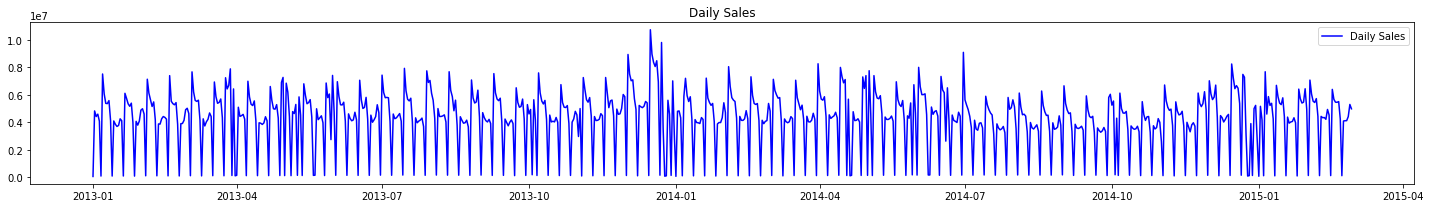

In [5]:
plot_ts(ts_df, title='Daily Sales', label='Daily Sales')

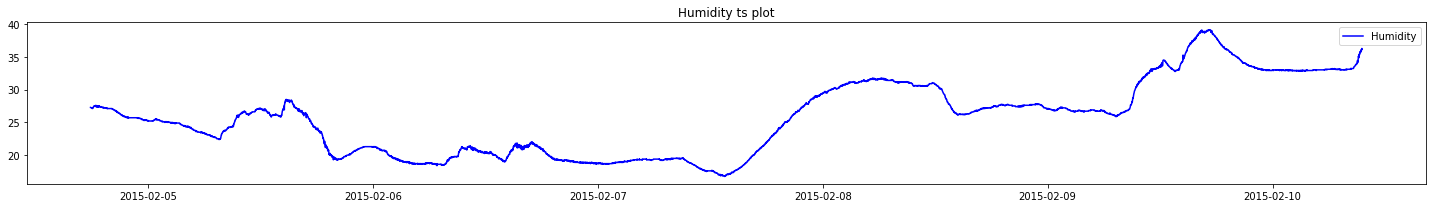

In [6]:
plot_ts(mul_ts_df['Humidity'], label='Humidity', title='Humidity ts plot')

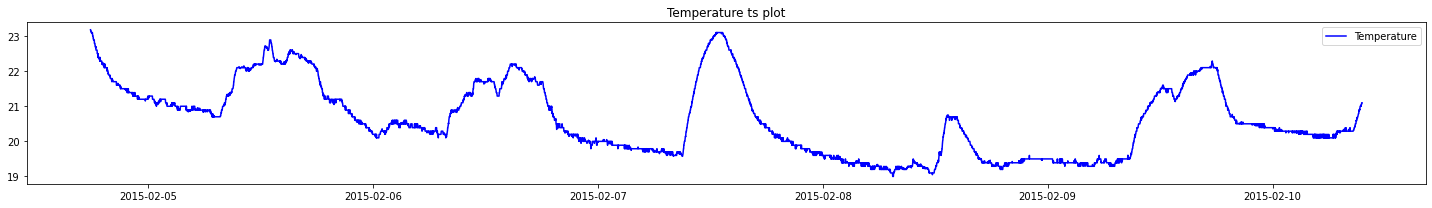

In [7]:
plot_ts(mul_ts_df['Temperature'], label='Temperature', title='Temperature ts plot')

In [8]:
ts_df = ts_df.reset_index()
ts_df.head()

Date  Daily_Sales
0 2013-01-01        58165
1 2013-01-02      4822042
2 2013-01-03      4415571
3 2013-01-04      4587035
4 2013-01-05      4078281

In [9]:
mul_ts_df = mul_ts_df.reset_index()
mul_ts_df.head()

date  Temperature  Humidity  Light     CO2  HumidityRatio  \
0 2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
1 2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
2 2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
3 2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
4 2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
0          1  
1          1  
2          1  
3          1  
4          1

## Detect Trend Changepoints

In [20]:
model1 = ChangepointDetector()
res = model1.find_trend_changepoints(
     df=ts_df,                                     
     time_col="Date",                          
     value_col="Daily_Sales",
     resample_freq = "1D",
     actual_changepoint_min_distance='1D', 
     potential_changepoint_n=50, 
     regularization_strength=None  # when this value is None, changepoints are selected through cross validation
    )
pd.DataFrame({"trend_changepoints": res["trend_changepoints"]})

trend_changepoints
0         2013-04-03
1         2013-04-19
2         2013-10-21
3         2013-11-06
4         2013-11-21
5         2013-12-07
6         2014-09-11
7         2014-10-12

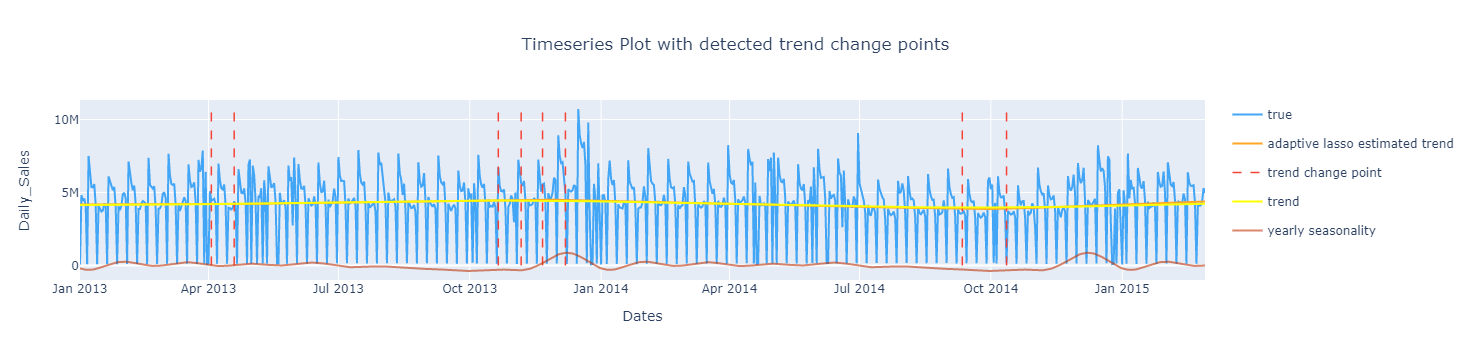

In [21]:
fig = model1.plot(plot=False, 
                 yearly_seasonality_estimate=True, 
                 adaptive_lasso_estimate=True)
plotly.io.show(fig)

In [31]:
model2 = ChangepointDetector()
res = model2.find_trend_changepoints(
     df=mul_ts_df,                                     
     time_col="date",                          
     value_col="Humidity",
     resample_freq = "1H",
     actual_changepoint_min_distance='1H', 
     potential_changepoint_n=10, 
     regularization_strength=0.3)
pd.DataFrame({"trend_changepoints": res["trend_changepoints"]})

trend_changepoints
0 2015-02-06 18:00:00

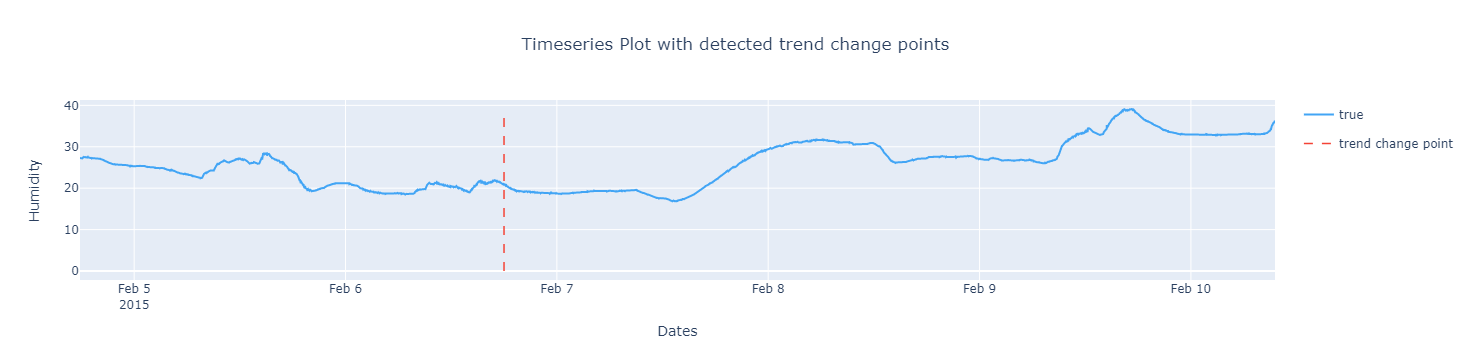

In [32]:
fig = model2.plot(plot=False, 
                 yearly_seasonality_estimate=False, 
                 adaptive_lasso_estimate=False,
                trend_estimate=False)
plotly.io.show(fig)

In [15]:
model3 = ChangepointDetector()
res = model3.find_trend_changepoints(
     df=mul_ts_df,                                     
     time_col="date",                          
     value_col="Temperature",
     resample_freq = "1H",
     actual_changepoint_min_distance='1H', 
     potential_changepoint_n=10, 
     regularization_strength=0.3)
pd.DataFrame({"trend_changepoints": res["trend_changepoints"]})

trend_changepoints
0 2015-02-08 08:00:00
1 2015-02-08 20:00:00

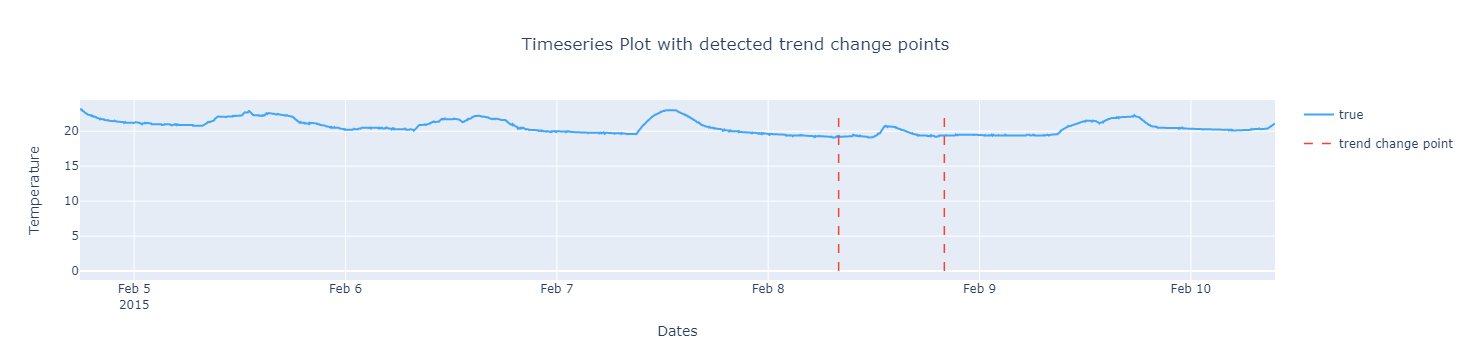

In [16]:
fig = model3.plot(plot=False, 
                 yearly_seasonality_estimate=False, 
                 adaptive_lasso_estimate=False,
                trend_estimate=False)
plotly.io.show(fig)

## Detect Seasonality Changepoint

In [24]:
res = model1.find_seasonality_changepoints(
     df=ts_df,                                     
     time_col="Date",                          
     value_col="Daily_Sales",
     resample_freq = "1D",
     actual_changepoint_min_distance='1D', 
     potential_changepoint_n=50,
     regularization_strength=None)    
pd.DataFrame(dict([(k, pd.Series(v)) for k, v in res["seasonality_changepoints"].items()]))

weekly     yearly
0 2013-01-16 2013-03-03
1 2013-04-03 2013-05-04
2        NaT 2013-05-20
3        NaT 2013-08-05
4        NaT 2013-09-21
5        NaT 2013-11-21
6        NaT 2013-12-22
7        NaT 2014-04-25

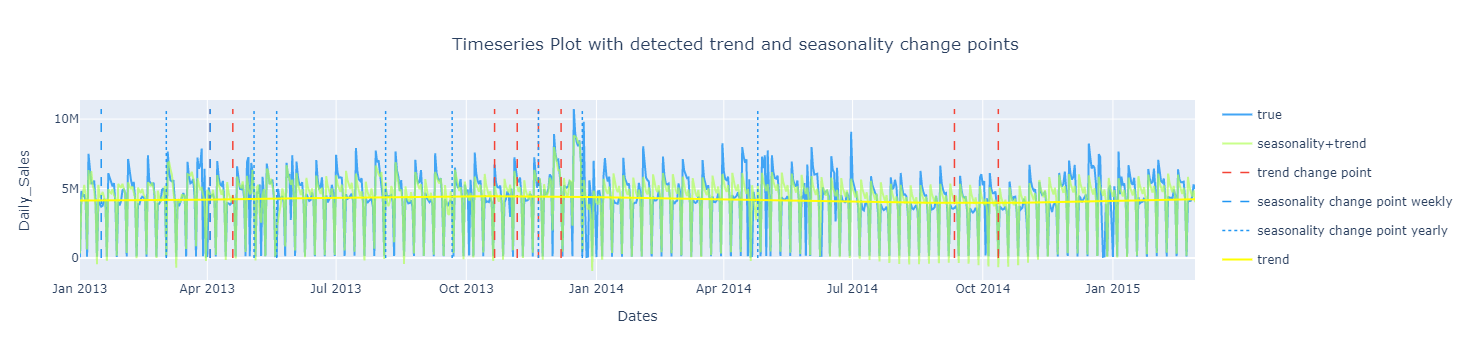

In [25]:
fig = model1.plot(
     seasonality_change=True,               
     seasonality_change_by_component=True,  
     seasonality_estimate=True,              
     plot=False)                        
plotly.io.show(fig)

In [28]:
res = model2.find_seasonality_changepoints(
     df=mul_ts_df,                                     
     time_col="date",                          
     value_col="Humidity",
     resample_freq = "1H",
     actual_changepoint_min_distance='1H', 
     potential_changepoint_n=10, 
     regularization_strength=None)
pd.DataFrame(dict([(k, pd.Series(v)) for k, v in res["seasonality_changepoints"].items()]))

daily              weekly              yearly
0    NaN 2015-02-05 18:30:59 2015-02-07 19:52:00

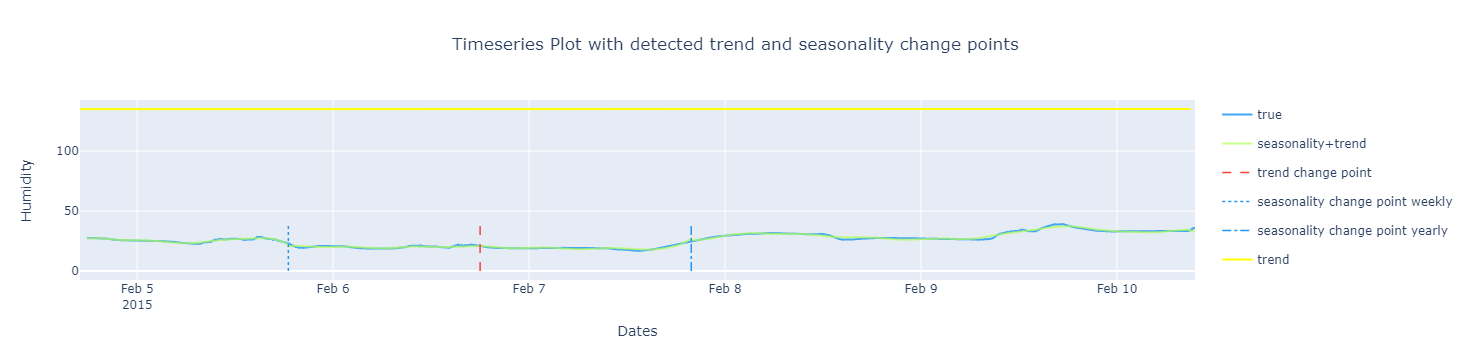

In [29]:
fig = model2.plot(
     seasonality_change=True,               
     seasonality_change_by_component=True,  
     seasonality_estimate=True,              
     plot=False)                        
plotly.io.show(fig)

In [33]:
res = model3.find_seasonality_changepoints(
     df=mul_ts_df,                                     
     time_col="date",                          
     value_col="Temperature",
     resample_freq = "1H",
     actual_changepoint_min_distance='1H', 
     potential_changepoint_n=10, 
     regularization_strength=None)
pd.DataFrame(dict([(k, pd.Series(v)) for k, v in res["seasonality_changepoints"].items()]))

daily              weekly  yearly
0 2015-02-04 17:51:00 2015-02-04 17:51:00     NaN
1 2015-02-05 06:10:59 2015-02-06 19:12:00     NaN
2 2015-02-05 18:30:59 2015-02-07 07:32:00     NaN
3 2015-02-07 07:32:00 2015-02-08 08:12:00     NaN
4 2015-02-07 19:52:00                 NaT     NaN
5 2015-02-08 08:12:00                 NaT     NaN
6 2015-02-09 08:53:00                 NaT     NaN

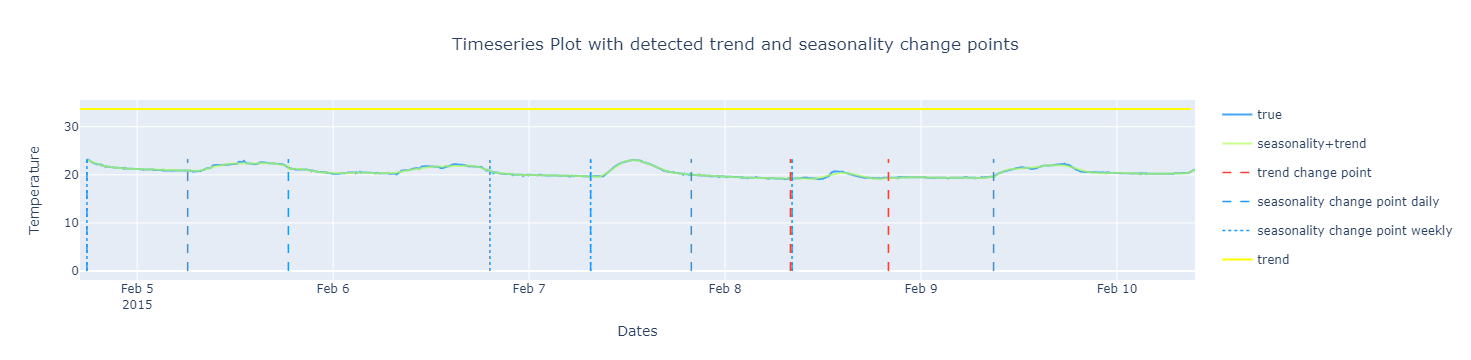

In [34]:
fig = model3.plot(
     seasonality_change=True,               
     seasonality_change_by_component=True,  
     seasonality_estimate=True,              
     plot=False)                        
plotly.io.show(fig)